<a href="https://colab.research.google.com/github/kou1-n/Home_Page/blob/master/NR_summerschool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Constants
E = 10000
A = 1
L = 10
P = 9000

# Initial conditions
u2 = 0.0
r2 = P

# Newton-Raphson iteration
for k in range(1, 21):
    ep = u2 / L  # Strain
    Dt = E * np.exp(-ep)  # Tangent modulus
    Kt = Dt * A / L  # Stiffness
    du = r2 / Kt  # Displacement increment
    u2 = u2 + du  # Update displacement

    # Update strain and stress
    ep = u2 / L
    sg = E * (1 - np.exp(-ep))  # Stress
    r2 = -(sg * A - P)  # Residual

    print(f"Iteration {k}, r2 = {r2:.8f}")

    # Convergence check
    if abs(r2) / abs(P) < 1e-8:
        break

print(f"Final displacement u2: {u2}")
print(f"Final load P: {P}")


Iteration 1, r2 = 3065.69659741
Iteration 2, r2 = 912.75651671
Iteration 3, r2 = 186.90739795
Iteration 4, r2 = 13.97354046
Iteration 5, r2 = 0.09584370
Iteration 6, r2 = 0.00000459
Final displacement u2: 23.02585088401625
Final load P: 9000


In [2]:
import numpy as np

# Constants
E = 10000
A = 1
L = 10
P = 9000

# Initial conditions
u2 = 0.0

# Incremental load
for n in range(1, 11):
    d2 = 0.0
    r2 = P / 10

    # Newton-Raphson iteration
    for k in range(1, 21):
        ep = (u2 + d2) / L  # Strain
        Dt = E * np.exp(-ep)  # Tangent modulus
        Kt = Dt * A / L  # Stiffness
        du = r2 / Kt  # Displacement increment
        d2 += du  # Update incremental displacement

        # Update strain and stress
        ep = (u2 + d2) / L
        sg = E * (1 - np.exp(-ep))  # Stress
        r2 = -(sg * A - P / 10 * n)  # Residual

        print(f"n = {n}, Iteration {k}, r2 = {r2:.8f}")

        # Convergence check
        if abs(r2) / abs(P / 10 * n) < 1e-8:
            break

    u2 += d2  # Update the total displacement after NR iteration
    print(f"n = {n}, u2 = {u2:.8f}, P = {P / 10 * n}")

print(f"Final displacement u2: {u2}")
print(f"Final load P: {P}")


n = 1, Iteration 1, r2 = 39.31185271
n = 1, Iteration 2, r2 = 0.08442694
n = 1, Iteration 3, r2 = 0.00000039
n = 1, u2 = 0.94310679, P = 900.0
n = 2, Iteration 1, r2 = 43.07385215
n = 2, Iteration 2, r2 = 0.11234458
n = 2, Iteration 3, r2 = 0.00000077
n = 2, u2 = 1.98450939, P = 1800.0
n = 3, Iteration 1, r2 = 47.63179698
n = 3, Iteration 2, r2 = 0.15405600
n = 3, Iteration 3, r2 = 0.00000163
n = 3, u2 = 3.14710745, P = 2700.0
n = 4, Iteration 1, r2 = 53.26805169
n = 4, Iteration 2, r2 = 0.21924505
n = 4, Iteration 3, r2 = 0.00000376
n = 4, u2 = 4.46287102, P = 3600.0
n = 5, Iteration 1, r2 = 60.41636380
n = 5, Iteration 2, r2 = 0.32703960
n = 5, Iteration 3, r2 = 0.00000972
n = 5, u2 = 5.97836999, P = 4500.0
n = 6, Iteration 1, r2 = 69.77892266
n = 6, Iteration 2, r2 = 0.51875432
n = 6, Iteration 3, r2 = 0.00002925
n = 6, u2 = 7.76528783, P = 5400.0
n = 7, Iteration 1, r2 = 82.57175661
n = 7, Iteration 2, r2 = 0.89472891
n = 7, Iteration 3, r2 = 0.00010815
n = 7, Iteration 4, r2 = 0.0

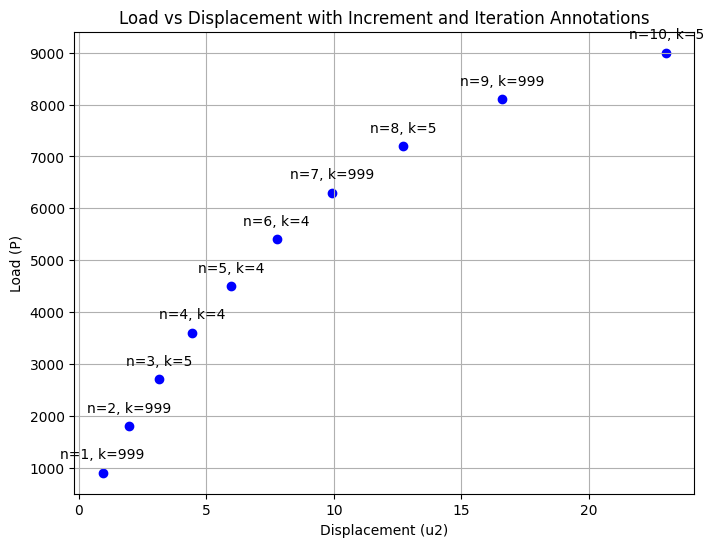

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E = 10000
A = 1
L = 10
P = 9000

# Initial conditions
u2 = 0.0
displacement = []
load = []
iterations = []

# Incremental load
for n in range(1, 11):
    d2 = 0.0
    r2 = P / 10
    iteration_count = 0

    # Newton-Raphson iteration
    for k in range(1, 1000):
        ep = (u2 + d2) / L  # Strain
        Dt = E * np.exp(-ep)  # Tangent modulus
        Kt = Dt * A / L  # Stiffness
        du = r2 / Kt  # Displacement increment
        d2 += du  # Update incremental displacement

        # Update strain and stress
        ep = (u2 + d2) / L
        sg = E * (1 - np.exp(-ep))  # Stress
        r2 = -(sg * A - P / 10 * n)  # Residual

        iteration_count = k

        # Convergence check
        if abs(r2) / abs(P / 10 * n) < 1e-100:
            break

    u2 += d2  # Update the total displacement after NR iteration

    # Store displacement, load and iteration count for plotting
    displacement.append(u2)
    load.append(P / 10 * n)
    iterations.append(iteration_count)

# Correcting the annotation to include both the load increment number (n) and the Newton-Raphson iteration count (k).
plt.figure(figsize=(8,6))
plt.scatter(displacement, load, c='blue')

# Annotate points with both load increment (n) and Newton-Raphson iteration count (k)
for i in range(len(displacement)):
    plt.annotate(f'n={i+1}, k={iterations[i]}', (displacement[i], load[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Displacement (u2)')
plt.ylabel('Load (P)')
plt.title('Load vs Displacement with Increment and Iteration Annotations')
plt.grid(True)
plt.show()
